In [1]:
train = pd.read_csv("../labeledTrainData.tsv", delimiter='\t', quoting=3)
train.tail()

,id,sentiment,review
24995,"""3453_3""",0,"""It seems like more consideration has gone int..."
24996,"""5064_1""",0,"""I don't believe they made this film. Complete..."
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui..."
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the..."
24999,"""8478_8""",1,"""I saw this movie as a child and it broke my h..."


In [2]:
test = pd.read_csv("../testData.tsv", delimiter="\t", quoting=3)
test.tail()

,id,review
24995,"""2155_10""","""Sony Pictures Classics, I'm looking at you! S..."
24996,"""59_10""","""I always felt that Ms. Merkerson had never go..."
24997,"""2531_1""","""I was so disappointed in this movie. I am ver..."
24998,"""7772_8""","""From the opening sequence, filled with black ..."
24999,"""11465_10""","""This is a great horror film for people who do..."


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB


In [4]:
train.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [5]:
train['review'][0][:700]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik'

html태그가 혼재해있어 정제해줄 필요가 있다.

### Data Cleaning and Text Preprocessing
1. BeautifulSoup을 통해 HTML태그 제거
2. 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
3. NLTk데이터를 사용해 불용어(Stopword) 제거 (eg: I my me...)
4. 어간추출(Stemming), 음소표기법(Lemmatizing)의 개념을 이해하고 SnowballStemmer를 통해 어간 추출

In [6]:
!pip show BeautifulSoup4

Name: beautifulsoup4
Version: 4.6.0
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: c:\programdata\anaconda3\lib\site-packages
Requires: 
Required-by: conda-build


##### 1. BeautifulSoup을 통해 HTML태그 제거

In [7]:
from bs4 import BeautifulSoup

In [65]:
example1 = BeautifulSoup(train['review'][1], "html5lib")

print(train['review'][1][:700])
example1.get_text()[:700]

"\"The Classic War of the Worlds\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \"critics\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most peop


'"\\"The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most peop'

##### 2. 정규표현식으로 특수문자 제거

In [66]:
import re

In [67]:
letters_only = re.sub('[^a-zA-Z]',' ', example1.get_text())
letters_only[:700]

'   The Classic War of the Worlds   by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H  G  Wells  classic book  Mr  Hines succeeds in doing so  I  and those who watched his film with me  appreciated the fact that it was not the standard  predictable Hollywood fare that comes out every year  e g  the Spielberg version with Tom Cruise that had only the slightest resemblance to the book  Obviously  everyone looks for different things in a movie  Those who envision themselves as amateur   critics   look only to criticize everything they can  Others rate a movie on more important bases like being entertained  which is why most peop'

In [68]:
# 모두 소문자로 나눈다
lower_case = letters_only.lower()

In [69]:
# 문자를 나눈다 (=토큰화한다.)
words = lower_case.split()
print(len(words))
words[:10]

161


['the',
 'classic',
 'war',
 'of',
 'the',
 'worlds',
 'by',
 'timothy',
 'hines',
 'is']

##### 3. 불용어(Stopword) 제거
- 실제로 많이 등장하는 단어지만 분석하는데 의미없는...(I,my,the,....)
- 예측하는데 실제로 기여하지 않아 다른 텍스트와 구별하지 못한다.

In [70]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [71]:
# stopwords를 제거한 토큰들
words = [word for word in words if not word in stopwords.words('english')]
print(len(words))
words[:10]

84


['classic',
 'war',
 'worlds',
 'timothy',
 'hines',
 'entertaining',
 'film',
 'obviously',
 'goes',
 'great']

439 -> 219개로 감소

##### 4-1. Stemming(어간 추출. 형태소 분석)
- cats, catlike, catty.... --> 어간 'cat'추출 

In [72]:
# 포터 스테머 사용
porter_stemmer = nltk.stem.PorterStemmer()
print(porter_stemmer.stem('maximum'))
print("The stemmed form of running: {}".format(porter_stemmer.stem("running")))
print("The stemmed form of runs: {}".format(porter_stemmer.stem("runs")))
print("The stemmed form of run: {}".format(porter_stemmer.stem("run")))

maximum
The stemmed form of running: run
The stemmed form of runs: run
The stemmed form of run: run


In [73]:
# 랭커스터 스테머 사용
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print("The stemmed form of running: {}".format(lancaster_stemmer.stem("running")))
print("The stemmed form of runs: {}".format(lancaster_stemmer.stem("runs")))
print("The stemmed form of run: {}".format(lancaster_stemmer.stem("run")))

maxim
The stemmed form of running: run
The stemmed form of runs: run
The stemmed form of run: run


In [74]:
# 스노우볼 스테머
from nltk.stem.snowball import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')
print(snowball_stemmer.stem('maximum'))
print("The stemmed form of running: {}".format(snowball_stemmer.stem("running")))
print("The stemmed form of runs: {}".format(snowball_stemmer.stem("runs")))
print("The stemmed form of run: {}".format(snowball_stemmer.stem("run")))

maximum
The stemmed form of running: run
The stemmed form of runs: run
The stemmed form of run: run


SnowballStemmer를 사용하도록 하겠슴.

In [75]:
stemmer = SnowballStemmer('english')
words = [stemmer.stem(word) for word in words]
words[:10]

['classic',
 'war',
 'world',
 'timothi',
 'hine',
 'entertain',
 'film',
 'obvious',
 'goe',
 'great']

going -> go, starting -> start....바뀜

##### 4-2. Lemmatization(음소표기법)
- 동음이의어가 문맥에 따라 다른 의미를 갖는데, 이를 앞뒤 문맥을 보고 식별

In [76]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [77]:
print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

fly
fly


In [78]:
words = [wordnet_lemmatizer.lemmatize(word) for word in words]
words[:10]

['classic',
 'war',
 'world',
 'timothi',
 'hine',
 'entertain',
 'film',
 'obvious',
 'goe',
 'great']

#### 문자열 처리과정을 함수화 해보자

In [91]:
def review_to_words(raw_review):
    # html 제거
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 영문자가 아닌 문자는 공백으로 변환
    letters_only = re.sub('[^a-zA-Z]', " ", review_text)
    # 소문자 변환, 토큰화
    words = letters_only.lower().split()
    
    # stopword 제거
    # 처리속도 향상을 위해 stopword를 list -> set으로 변환
    stopword = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stopword]
    
    # 어간 추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    
    # 공백으로 구분된 문자열로 결합하여 결과 반환
    return(" ".join(stemming_words))

In [95]:
review_cleaning = review_to_words(train['review'][3])
print(train['review'][3])
review_cleaning

"It must be assumed that those who praised this film (\"the greatest filmed opera ever,\" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It's questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is \"about\" should be allowed anywhere near a theatre or film studio; Syberberg, very fashionably, but without the smallest justification from Wagner's text, decided that Parsifal is \"about\" bisexual integration, so that the title character, in the latter stages, transmutes into a kind of beatnik babe, though one who continues to sing high tenor -- few if any of the actors in the film are the singers, and we get a double 

'must assum prais film greatest film opera ever read somewher either care opera care wagner care anyth except desir appear cultur either represent wagner swan song movi strike unmitig disast leaden read score match tricksi lugubri realis text question peopl idea opera matter play especi one shakespear allow anywher near theatr film studio syberberg fashion without smallest justif wagner text decid parsif bisexu integr titl charact latter stage transmut kind beatnik babe though one continu sing high tenor actor film singer get doubl dose armin jordan conductor seen face heard voic amforta also appear monstrous doubl exposur kind batonzilla conductor ate monsalvat play good friday music way transcend loveli natur repres scatter shopworn flaccid crocus stuck ill laid turf expedi baffl theatr sometim piec imperfect thought think syberberg splice parsif gurnemanz mountain pastur lush provid juli andrew sound music sound hard endur high voic trumpet particular possess aural glare add anoth s

#### 전체 리뷰에 적용해보자

In [96]:
num_review = train.review.size
num_review

25000

In [97]:
train['review_cleaning'] = train['review'].apply(review_to_words)

In [98]:
test['review_cleaning'] = test['review'].apply(review_to_words)

오래 걸림..

In [25]:
# from multiprocessing import Pool

In [26]:
# def _apply_df(args):
#     df, func, kwargs = args
#     return df.apply(func, **kwargs)

# def apply_by_multiprocessing(df, func, **kwargs):
#     workers = kwargs.pop('workers')
#     pool = Pool(processes=workers)
#     result = pool.map(_apply_df, [(d, func, kwargs)
#                                  for d in np.array_split(df, workers)])
#     pool.close()
    
#     return pd.concat(list(result))

In [99]:
train['num_words'] = train.review_cleaning.map(lambda x: len(str(x).split()))
train['num_uniq_words'] = train.review_cleaning.map(lambda x: len(set(str(x).split())))

In [100]:
x = train.review_cleaning[0]
x = str(x).split()
print(len(x))
x[:10]

219


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [101]:
train.num_words[2], train.num_uniq_words[0]

(240, 156)

리뷰별 단어 평균 갯수 :  119.52356
리뷰별 단어 갯수의 중간값 :  89.0
리뷰별 고유 단어 평균 갯수 :  94.05756
리뷰별 고유 단어 갯수의 중간값 :  74.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'리뷰별 고유 단어 수 분포')

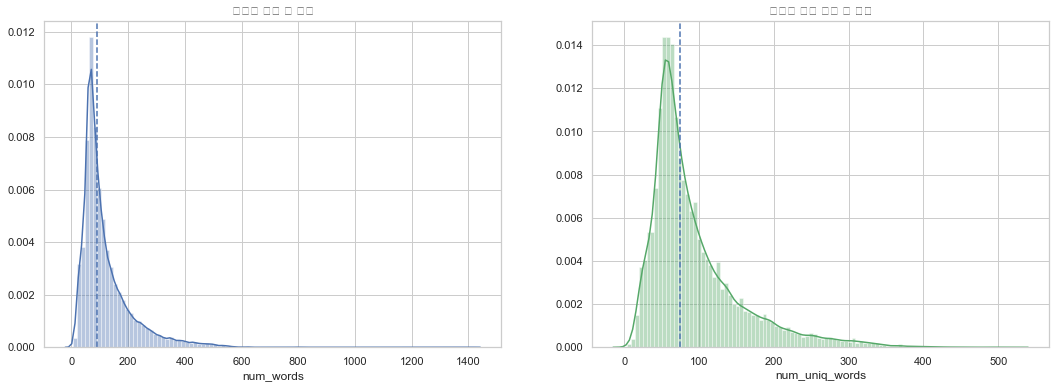

In [102]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(18, 6)
print('리뷰별 단어 평균 갯수 : ', train['num_words'].mean())
print('리뷰별 단어 갯수의 중간값 : ', train['num_words'].median())
sns.distplot(train['num_words'], bins=100, ax=axes[0])
axes[0].axvline(train['num_words'].median(), linestyle='dashed')
axes[0].set_title('리뷰별 단어 수 분포')

print('리뷰별 고유 단어 평균 갯수 : ', train['num_uniq_words'].mean())
print('리뷰별 고유 단어 갯수의 중간값 : ', train['num_uniq_words'].median())
sns.distplot(train['num_uniq_words'], bins=100, color='g', ax=axes[1])
axes[1].axvline(train['num_uniq_words'].median(), linestyle='dashed')
axes[1].set_title("리뷰별 고유 단어 수 분포")

In [103]:
train.to_csv("train_preprocessing.csv", index=False)